In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
P1 = """你是一个逻辑游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜题。
2. 参与者可以通过提问来获取线索，尝试解开谜题。
3. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。
4. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。
5. 参与者需要根据回答来推理，并最终找出谜题的正确答案。

请严格按照这些规则回答参与者提出的问题。

谜题: {}

实际情况: {}

参与者提出的问题: {}
"""

In [6]:
P2 = """你是一个情景猜谜游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜面，谜面会描述一个简单又难以理解的事件。
2. 主持人知道谜底，谜底是谜面的答案。
3. 参与者可以询问任何封闭式问题来找寻事件的真相。
4. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。各回答的判断标准如下：
   - 若谜面和谜底能找到问题的答案，回答：是或者不是
   - 若谜面和谜底不能直接或者间接推断出问题的答案，回答：不重要
   - 若参与者提问不是一个封闭式问题或者问题难以理解，回答：问法错误
   - 若参与者提问基本还原了谜底真相，回答：回答正确
5. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。

请严格按照这些规则回答参与者提出的问题。

**谜面:** {}

**谜底:** {}

**参与者提出的问题:** {}
"""

In [7]:
import pandas as pd

df_p1 = pd.read_csv("results/mgtv-results_p1_full_metrics.csv")
df_p1

epoch                                           model  accuracy  precision  \
0      0                 internlm/internlm2_5-7b-chat-1m  0.759667   0.741854   
1      1   internlm/internlm2_5-7b-chat-1m_checkpoint-44  0.761667   0.810873   
2      2   internlm/internlm2_5-7b-chat-1m_checkpoint-88  0.741333   0.816182   
3      3  internlm/internlm2_5-7b-chat-1m_checkpoint-132  0.755000   0.809829   
4      4  internlm/internlm2_5-7b-chat-1m_checkpoint-176  0.719000   0.803307   

     recall        f1  
0  0.781014  0.758887  
1  0.761667  0.780018  
2  0.741333  0.769524  
3  0.755000  0.775657  
4  0.719000  0.750319

In [8]:
df_p2 = pd.read_csv("results/mgtv-results_p2_full_metrics.csv")
df_p2

epoch                                           model  accuracy  precision  \
0      0                 internlm/internlm2_5-7b-chat-1m  0.766000   0.747969   
1      1   internlm/internlm2_5-7b-chat-1m_checkpoint-88  0.796333   0.808232   
2      2  internlm/internlm2_5-7b-chat-1m_checkpoint-176  0.781333   0.804716   
3      3  internlm/internlm2_5-7b-chat-1m_checkpoint-264  0.759000   0.805502   
4      4  internlm/internlm2_5-7b-chat-1m_checkpoint-352  0.730333   0.790676   
5      5  internlm/internlm2_5-7b-chat-1m_checkpoint-440  0.730333   0.790420   
6      6  internlm/internlm2_5-7b-chat-1m_checkpoint-528  0.716000   0.789892   

     recall        f1  
0  0.787526  0.764922  
1  0.796333  0.798160  
2  0.781333  0.788581  
3  0.759000  0.777237  
4  0.730333  0.753716  
5  0.730333  0.753750  
6  0.716000  0.744833

In [9]:
df_p2 = df_p2[: len(df_p1)]

In [10]:
df_p1_llama3 = pd.read_csv("results/mgtv-llama3_p1_full_metrics.csv")
df_p1_llama3

epoch                                              model  accuracy  \
0       0                shenzhi-wang/Llama3-8B-Chinese-Chat  0.783667   
1       1  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.779667   
2       2  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.674000   
3       3  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.639333   
4       4  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.654667   
5       5  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.640000   
6       6  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.649000   
7       7  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.645000   
8       8  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.652667   
9       9  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.634333   
10     10  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.629333   

    precision    recall        f1  
0    0.766712  0.792917  0.767940  
1    0.793284  0.779667  0.780181  
2    0.785928  0.674000  0.709822  
3    0.776385  0.639333  0.688929  
4    0.761004  0.654667  0.692352  
5    0.756897  0.640000  0.671627  
6    0.758525  0.649000  0.684541  
7    0.749263  0.645000  0.667193  
8    0.760601  0.652667  0.689845  
9    0.752522  0.634333  0.670198  
10   0.745948  0.629333  0.666929

In [11]:
df_p2_llama3 = pd.read_csv("results/mgtv-llama3_p2_full_metrics.csv")
df_p2_llama3

epoch                                              model  accuracy  \
0       0                shenzhi-wang/Llama3-8B-Chinese-Chat  0.730333   
1       1  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.767333   
2       2  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.728667   
3       3  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.698000   
4       4  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.709333   
5       5  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.679333   
6       6  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.667000   
7       7  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.645667   
8       8  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.654667   
9       9  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.643000   
10     10  shenzhi-wang/Llama3-8B-Chinese-Chat_checkpoint...  0.647667   

    precision    recall        f1  
0    0.771041  0.730333  0.746484  
1    0.795680  0.767333  0.770909  
2    0.820787  0.728667  0.763019  
3    0.795399  0.698000  0.733230  
4    0.793851  0.709333  0.740102  
5    0.791366  0.679333  0.720183  
6    0.787851  0.667000  0.710294  
7    0.764853  0.645667  0.680705  
8    0.769380  0.654667  0.687044  
9    0.766252  0.643000  0.678544  
10   0.766725  0.647667  0.684851

In [12]:
df_p1_glm_4 = pd.read_csv("results/mgtv-glm-4-9b_p1_full_metrics.csv")
df_p1_glm_4

epoch                                  model  accuracy  precision  \
0      0                 THUDM/glm-4-9b-chat-1m  0.581000   0.703006   
1      1  THUDM/glm-4-9b-chat-1m_checkpoint-175  0.465000   0.462698   
2      2  THUDM/glm-4-9b-chat-1m_checkpoint-350  0.579000   0.677205   
3      3  THUDM/glm-4-9b-chat-1m_checkpoint-525  0.605333   0.722023   
4      4  THUDM/glm-4-9b-chat-1m_checkpoint-700  0.593000   0.720287   

     recall        f1  
0  0.581000  0.616915  
1  0.478067  0.452823  
2  0.579000  0.607769  
3  0.605333  0.637907  
4  0.593000  0.631179

In [13]:
df_p2_glm_4 = pd.read_csv("results/mgtv-glm-4-9b_p2_full_metrics.csv")
df_p2_glm_4

epoch                                  model  accuracy  precision  \
0      0                 THUDM/glm-4-9b-chat-1m  0.395000   0.667648   
1      1  THUDM/glm-4-9b-chat-1m_checkpoint-175  0.594667   0.705625   
2      2  THUDM/glm-4-9b-chat-1m_checkpoint-350  0.549000   0.700654   
3      3  THUDM/glm-4-9b-chat-1m_checkpoint-525  0.598667   0.715051   
4      4  THUDM/glm-4-9b-chat-1m_checkpoint-700  0.584333   0.730090   

     recall        f1  
0  0.395000  0.458390  
1  0.594667  0.631524  
2  0.549000  0.595640  
3  0.598667  0.625357  
4  0.584333  0.619578

In [14]:
def plot_results(df_p1, df_p2, best_p1, best_p2, color_p1="red", color_p2="blue", model_name="InternLM2.5_7b"):
    sns.lineplot(
        x="epoch",
        y="accuracy",
        data=df_p1,
        ax=ax[0],
        color=color_p1,
        label=f"{model_name}: P1",
    )
    sns.lineplot(
        x="epoch",
        y="accuracy",
        data=df_p2,
        ax=ax[0],
        color=color_p2,
        label=f"{model_name}: P2",
    )
    sns.scatterplot(
        x="epoch", y="accuracy", data=best_p1, ax=ax[0], color=color_p1, s=50
    )
    sns.scatterplot(
        x="epoch", y="accuracy", data=best_p2, ax=ax[0], color=color_p2, s=50
    )

    sns.lineplot(
        x="epoch",
        y="f1",
        data=df_p1,
        ax=ax[1],
        color=color_p1,
        label=f"{model_name}: P1",
    )
    sns.lineplot(
        x="epoch",
        y="f1",
        data=df_p2,
        ax=ax[1],
        color=color_p2,
        label=f"{model_name}: P2",
    )
    sns.scatterplot(x="epoch", y="f1", data=best_p1, ax=ax[1], color=color_p1, s=50)
    sns.scatterplot(x="epoch", y="f1", data=best_p2, ax=ax[1], color=color_p2, s=50)

In [15]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def plot_model_results(model_name, df_p1, df_p2, ax):
    print(f"Model: {model_name}")
    sns.set_theme(style="whitegrid")

    # print the best results
    best_p1 = df_p1[df_p1["accuracy"] == df_p1["accuracy"].max()]
    best_p2 = df_p2[df_p2["accuracy"] == df_p2["accuracy"].max()]

    print("Best P1 accuracy:")
    print(best_p1["accuracy"].values[0])
    print("Best P2 accuracy:")
    print(best_p2["accuracy"].values[0])

    plot_results(df_p1, df_p2, best_p1, best_p2, model_name=model_name)

    for a in ax:
        for line_index, line in enumerate(a.lines):
            # Get the data
            line_color = line.get_color()
            xdata, ydata = line.get_data()
            for index in range(xdata.size):
                a.annotate(  # Use 'a' instead of 'ax' to refer to the current subplot
                    f"{ydata[index]:.3f}",
                    xy=(xdata[index], ydata[index]),
                    textcoords="offset points",
                    xytext=(
                        0,
                        1,
                        # -10 if line_index % 2 == 0 else 10,
                    ),  # Adjusted for better visibility
                    ha="center",
                    color=line_color,
                )

    ax[0].set_title("Accuracy")
    ax[1].set_title("F1")

    # After plotting your data and before plt.show(), add these lines
    ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.show()

Model: InternLM_2_5-7b
Best P1 accuracy:
0.7616666666666667
Best P2 accuracy:
0.7963333333333333


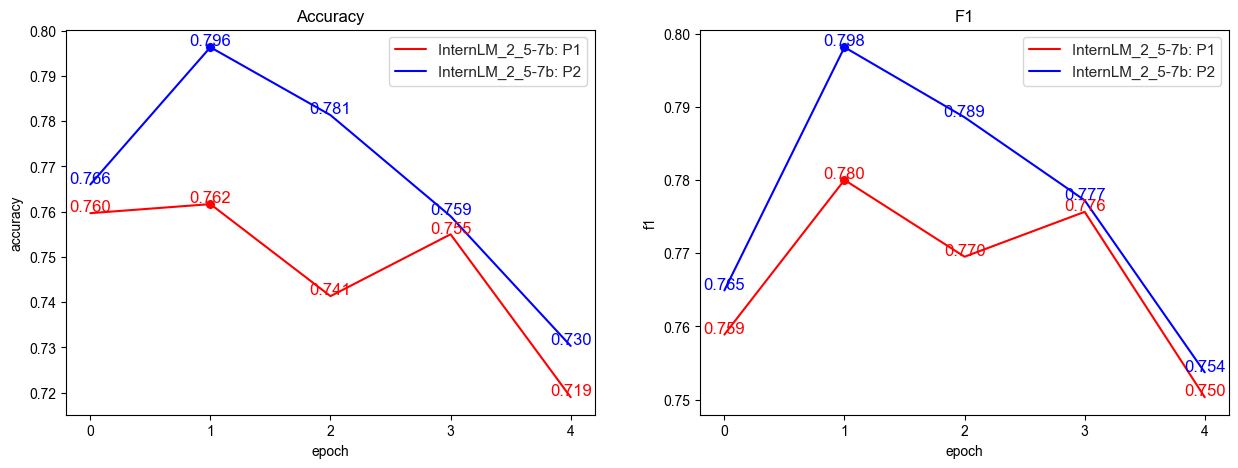

In [16]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_model_results("InternLM_2_5-7b", df_p1, df_p2, ax)

Model: Llama3-8b
Best P1 accuracy:
0.7836666666666666
Best P2 accuracy:
0.7673333333333333


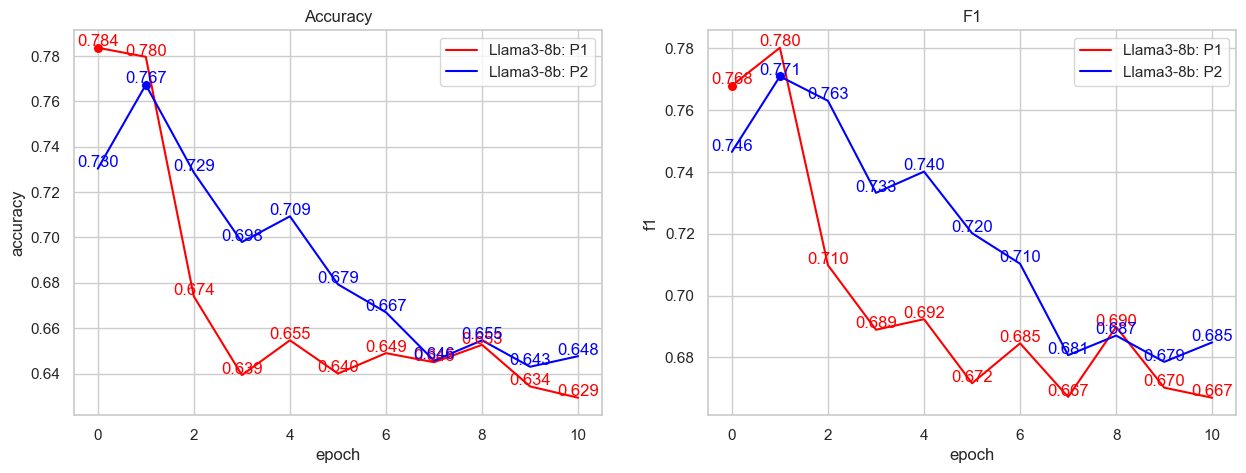

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_model_results("Llama3-8b", df_p1_llama3, df_p2_llama3, ax)

Model: GLM-4-9b
Best P1 accuracy:
0.6053333333333333
Best P2 accuracy:
0.5986666666666667


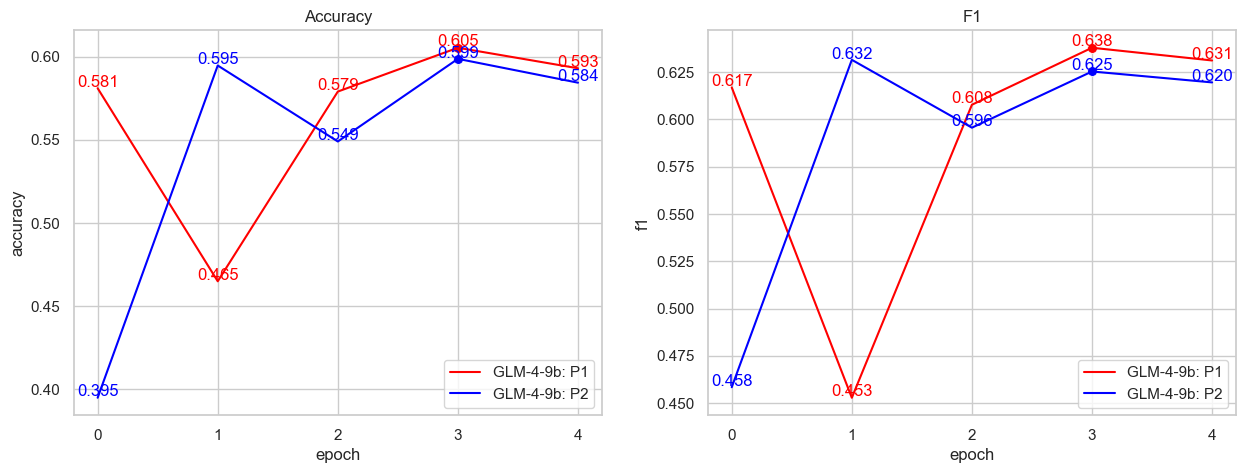

In [18]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_model_results("GLM-4-9b", df_p1_glm_4, df_p2_glm_4, ax)